美国Apple股票价格图

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

从yfinance中，获取apple股票价格，并输出前5行

In [2]:
ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742676,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200


数据处理：给data表格添加新列Daily Return，该列是从原始列调整过的收盘价格，通过计算数据的百分比变化率得到股票的日收益率数据

In [3]:
data['Daily Return'] = data['Adj Close'].pct_change()
data['Daily Return']

Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
                ...   
2022-12-23   -0.002798
2022-12-27   -0.013878
2022-12-28   -0.030685
2022-12-29    0.028324
2022-12-30    0.002469
Name: Daily Return, Length: 756, dtype: float64

# 数据可视化

创建一个宽 14 英寸、高 7 英寸的绘图区域

In [5]:
plt.figure(figsize=(14,7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

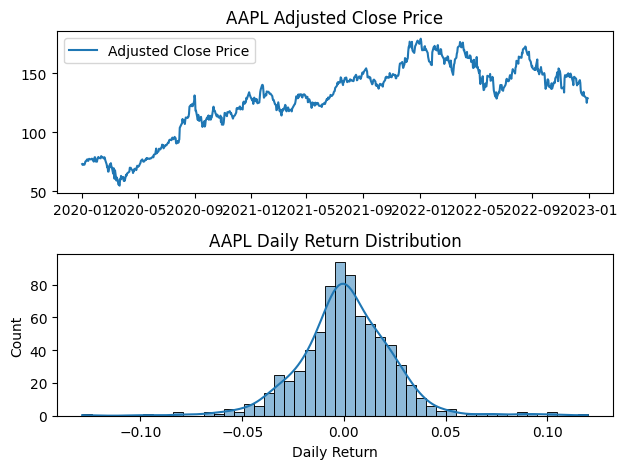

In [10]:
# 收盘价时间序列图
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adjusted Close Price')
plt.title(f'{ticker} Adjusted Close Price')
plt.legend()

# 日收益率分布图
plt.subplot(2, 1, 2)
sns.histplot(data['Daily Return'].dropna(), kde=True, bins=50)
plt.title(f'{ticker} Daily Return Distribution')

plt.tight_layout()
plt.show()

生成20日均线、50日均线、200日均线、调整过的收盘价折线图

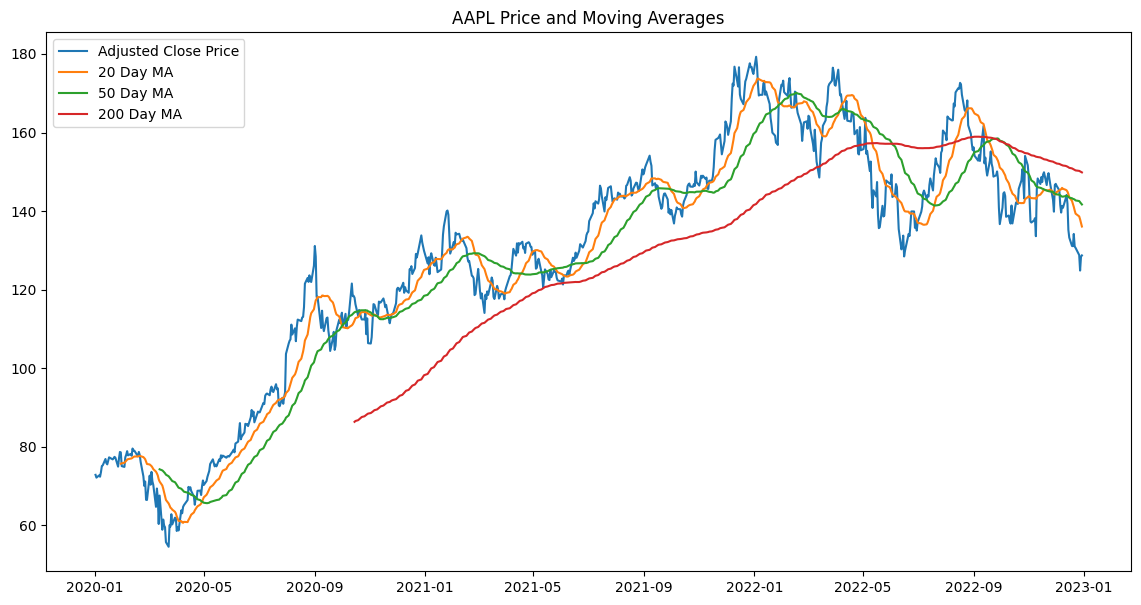

In [9]:
data['20 Day MA'] = data['Adj Close'].rolling(window=20).mean()
data['50 Day MA'] = data['Adj Close'].rolling(window=50).mean()
data['200 Day MA'] = data['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(14,7))
plt.plot(data['Adj Close'], label='Adjusted Close Price')
plt.plot(data['20 Day MA'], label='20 Day MA')
plt.plot(data['50 Day MA'], label='50 Day MA')
plt.plot(data['200 Day MA'], label='200 Day MA')
plt.title(f'{ticker} Price and Moving Averages')
plt.legend()
plt.show()